In [ ]:
#1. Define Problem Statement and perform Exploratory Data Analysis
#• Definition of problem (as per given problem statement with additional views)
#• Observations on shape of data, data types of all the attributes, conversion of
#categorical attributes to 'category' (If required), missing value detection,
#statistical summary.
#• Univariate Analysis (distribution plots of all the continuous variable(s)
##barplots/countplots of all the categorical variables)
#• Bivariate Analysis (Relationships between important variables such as workday
#and count, season and count, weather and count.
#• Illustrate the insights based on EDA
#▪ Comments on range of attributes, outliers of various attributes
#▪ Comments on the distribution of the variables and relationship
#between them
#▪ Comments for each univariate and bivariate plots

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the data into a DataFrame
data = pd.read_csv('jamboree_admission.csv')
data.head()  # Display the first few rows


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#This command is used  with pandas DataFrames to display the last few rows of the dataset.
# By default, df.tail() shows the last 5 rows
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
# Checking the structure of the data
data.info()  # Gives an overview of data types and non-null values

# Checking basic statistics for numerical columns
data.describe()  # Provides summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
#This is used to declare the shape or describe how many rows and columns are there in the dataset
data.shape

(500, 9)

In [8]:
#This is basically used for describing the numerical data in the dataset
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data['GRE Score'].value_counts()

,count
GRE Score,
312,24
324,23
316,18
321,17
322,17
327,17
311,16
320,16
314,16


In [10]:
data['TOEFL Score'].value_counts()

,count
TOEFL Score,
110,44
105,37
104,29
107,28
106,28
112,28
103,25
100,24
102,24


In [ ]:
#This command is used to find the unique values in the columns
data["University Rating"].nunique()

5

In [11]:
data['University Rating'].value_counts()

,count
University Rating,
3,162
2,126
4,105
5,73
1,34


In [12]:
data['SOP'].value_counts()

,count
SOP,
4.0,89
3.5,88
3.0,80
2.5,64
4.5,63
2.0,43
5.0,42
1.5,25
1.0,6


In [13]:
data["CGPA"].nunique()

184

In [14]:
data["CGPA"].nunique()

184

In [15]:
data['Research'].value_counts()

,count
Research,
1,280
0,220


<Axes: xlabel='GRE Score', ylabel='Count'>

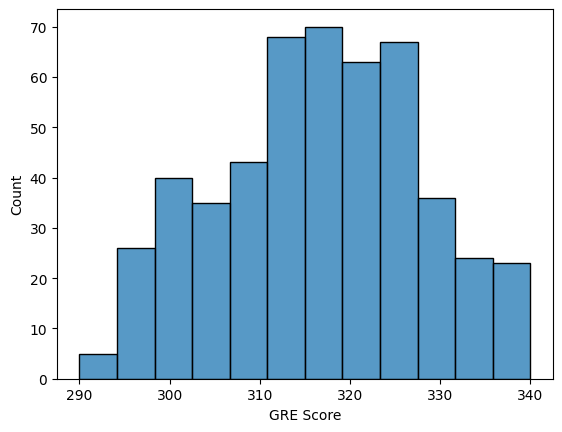

In [17]:
#across different values and is especially useful for exploratory data analysis.
sns.histplot(data["GRE Score"])


<Axes: xlabel='SOP', ylabel='Count'>

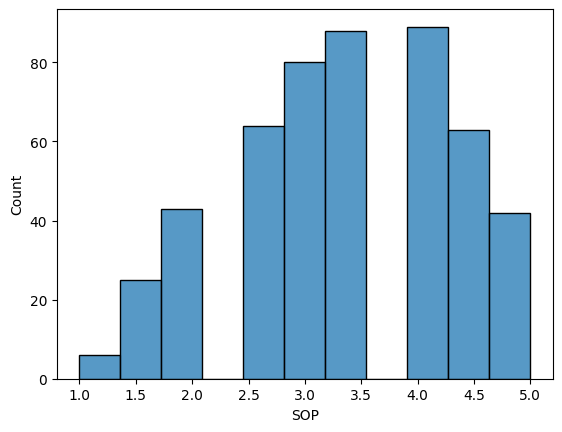

In [18]:
sns.histplot(data["SOP"])

<Axes: xlabel='TOEFL Score', ylabel='Count'>

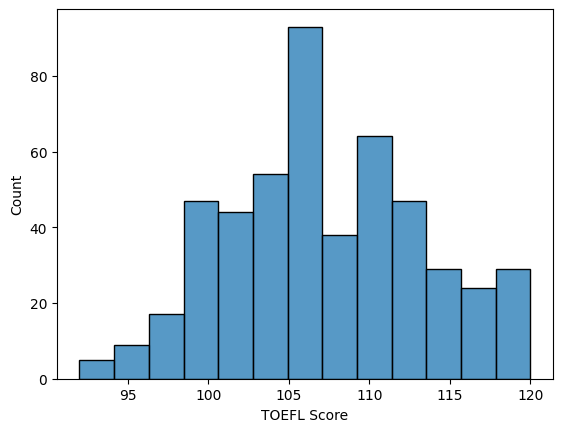

In [19]:
sns.histplot(data["TOEFL Score"])


<Axes: xlabel='LOR ', ylabel='Count'>

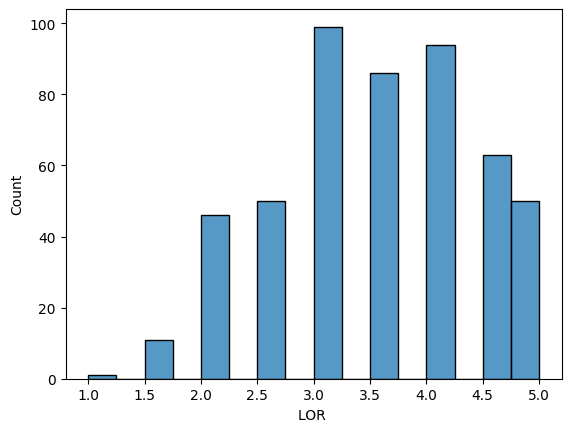

In [20]:

sns.histplot(data["LOR "])


<Axes: xlabel='CGPA', ylabel='Count'>

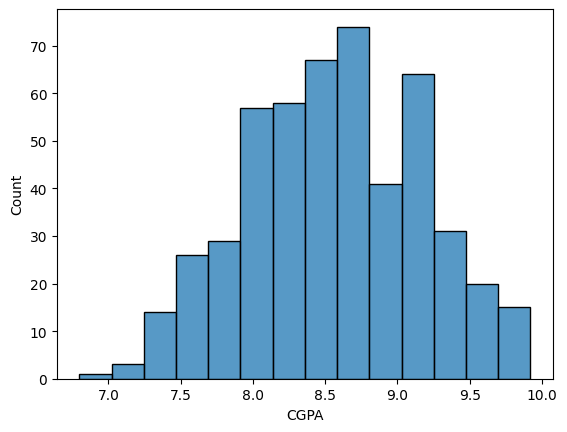

In [21]:

sns.histplot(data["CGPA"])


<Axes: xlabel='Chance of Admit ', ylabel='Count'>

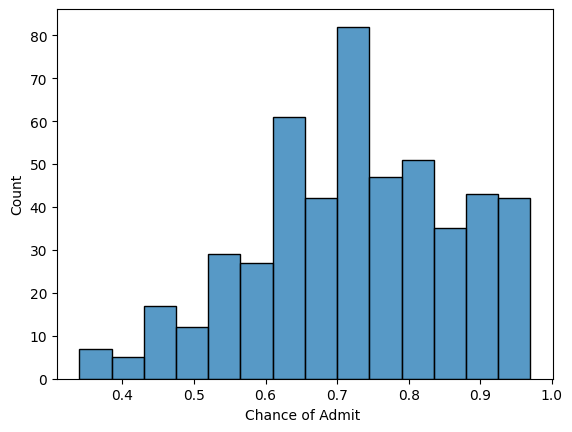

In [22]:

sns.histplot(data["Chance of Admit "])


<Axes: xlabel='University Rating', ylabel='Count'>

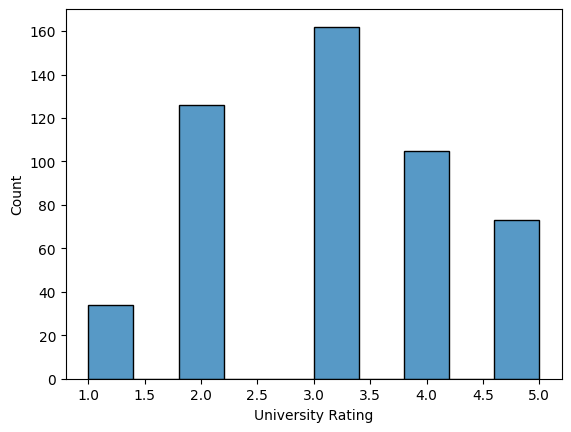

In [23]:

sns.histplot(data["University Rating"])

<Axes: xlabel='Research', ylabel='Count'>

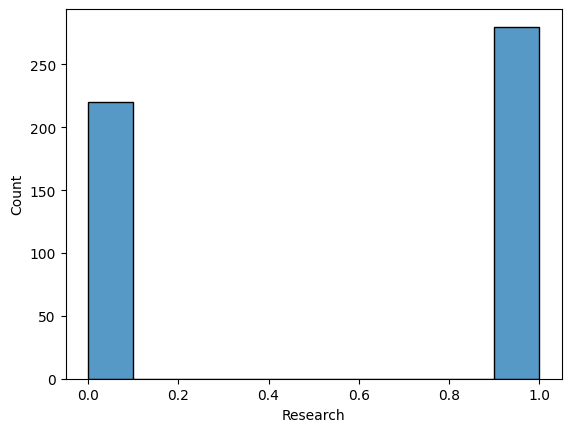

In [24]:
sns.histplot(data["Research"])

<Axes: xlabel='GRE Score', ylabel='count'>

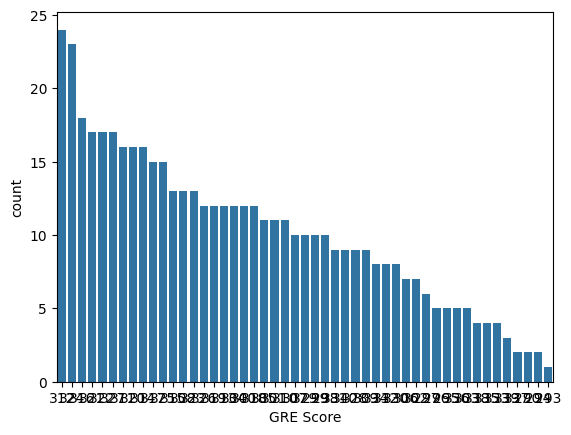

In [25]:
sns.countplot(data =data,x = "GRE Score",order = data["GRE Score"].value_counts().index)

<Axes: xlabel='TOEFL Score', ylabel='count'>

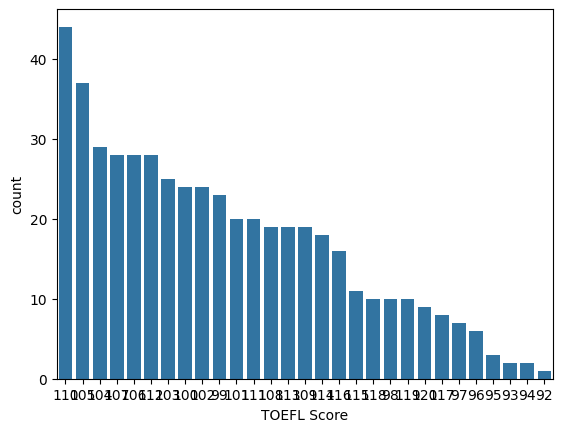

In [26]:
sns.countplot(data =data,x = "TOEFL Score",order = data["TOEFL Score"].value_counts().index)

<Axes: xlabel='University Rating', ylabel='count'>

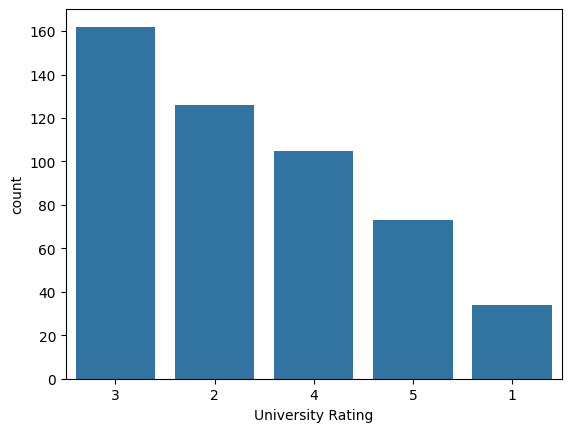

In [27]:
sns.countplot(data =data,x = "University Rating",order = data["University Rating"].value_counts().index)

<Axes: xlabel='CGPA', ylabel='count'>

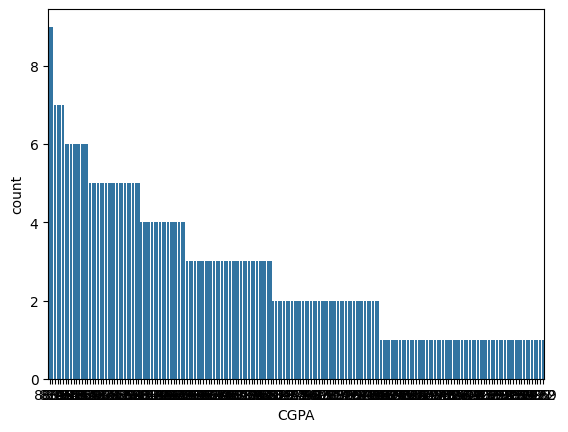

In [28]:
sns.countplot(data =data,x = "CGPA",order = data["CGPA"].value_counts().index)

<Axes: xlabel='SOP', ylabel='count'>

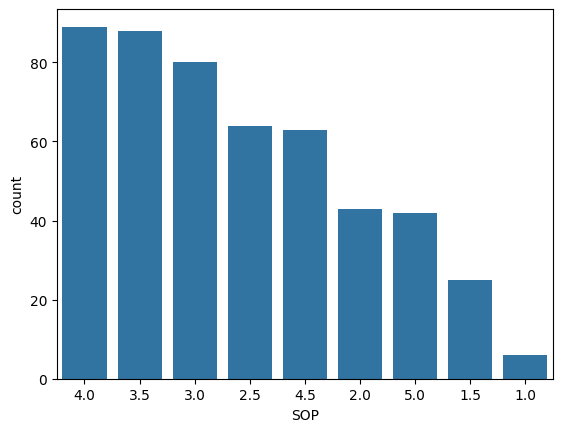

In [29]:
sns.countplot(data =data,x = "SOP",order = data["SOP"].value_counts().index)

<Axes: xlabel='GRE Score', ylabel='University Rating'>

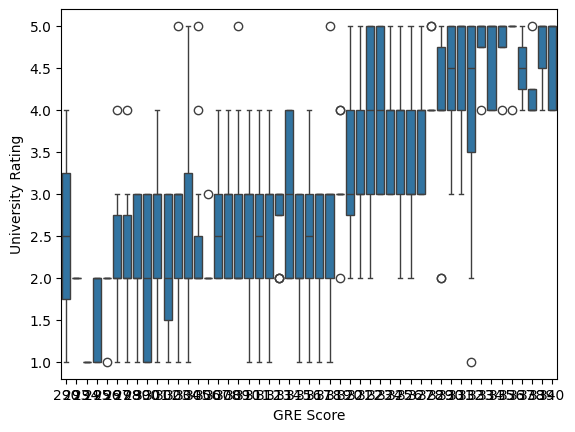

In [30]:
#Box plots are particularly useful for identifying outliers and understanding the spread and skewness of the data.
sns.boxplot(data =data,
            x = "GRE Score",
            y = "University Rating")

<Axes: xlabel='TOEFL Score', ylabel='University Rating'>

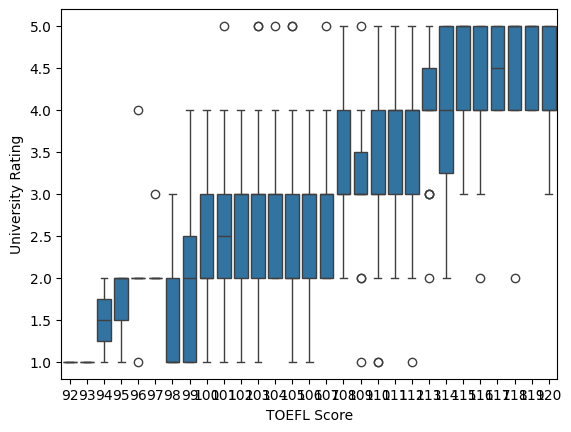

In [31]:
sns.boxplot(data =data,
            x = "TOEFL Score",
            y = "University Rating")

<Axes: xlabel='SOP', ylabel='University Rating'>

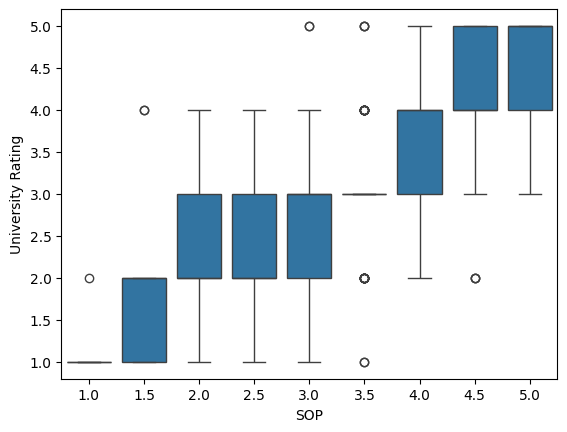

In [32]:
sns.boxplot(data =data,
            x = "SOP",
            y = "University Rating")

In [36]:
#used to find how they are correlated with each other
df1 = data.corr()
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


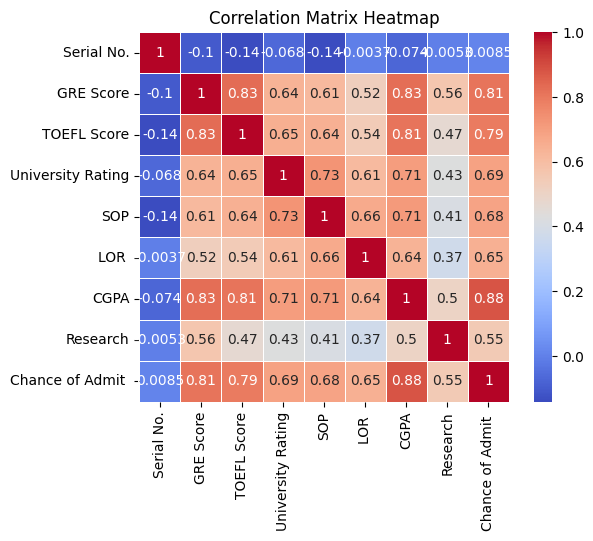

In [35]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)

# Customize the heatmap for better visualization
plt.title("Correlation Matrix Heatmap")
plt.show()

In [37]:
# Check for duplicate rows
print(f"Duplicate rows: {data.duplicated().sum()}")

# Check for missing values
print("Missing values:", data.isnull().sum())

Duplicate rows: 0
Missing values: Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [41]:
print("\nStatistical summary of numerical columns:")
print(data.describe())


Statistical summary of numerical columns:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000   

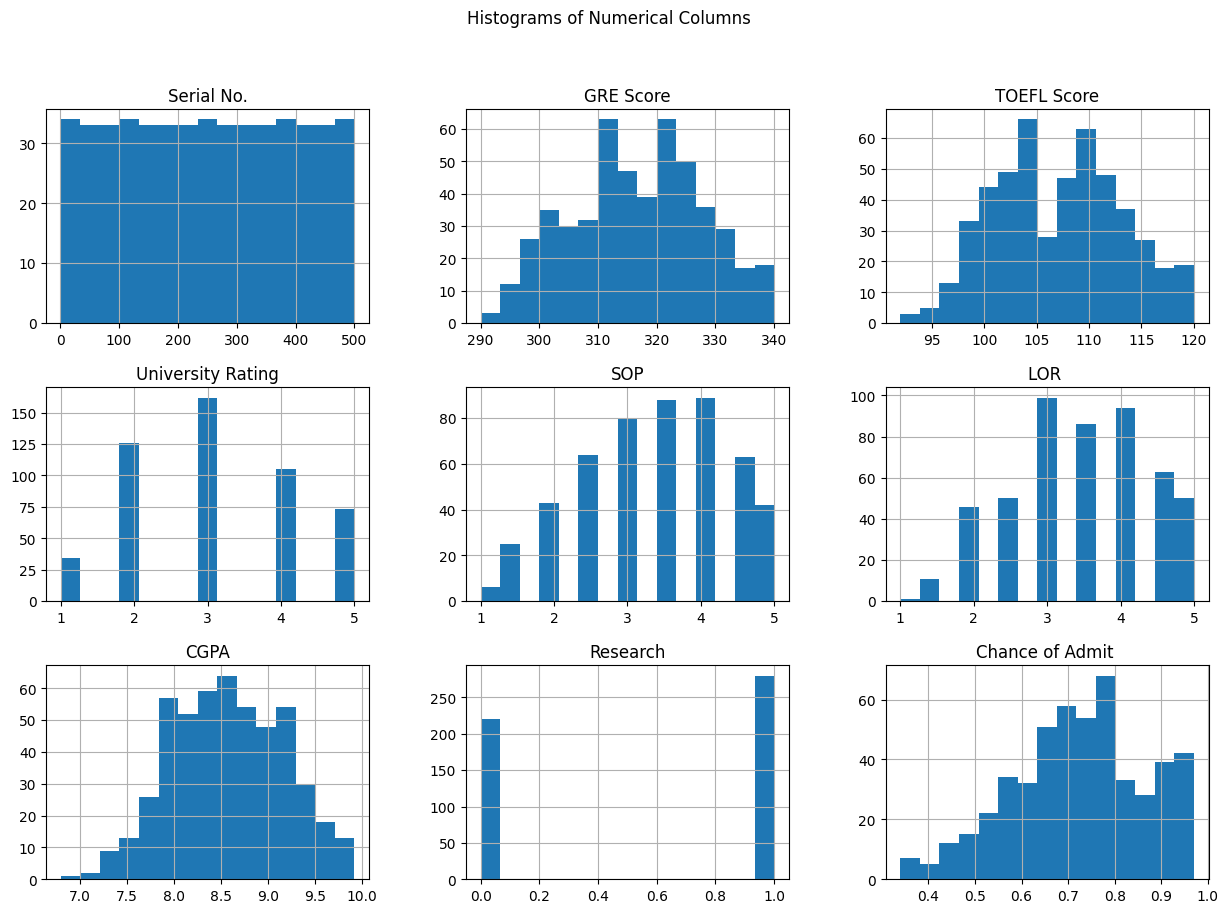

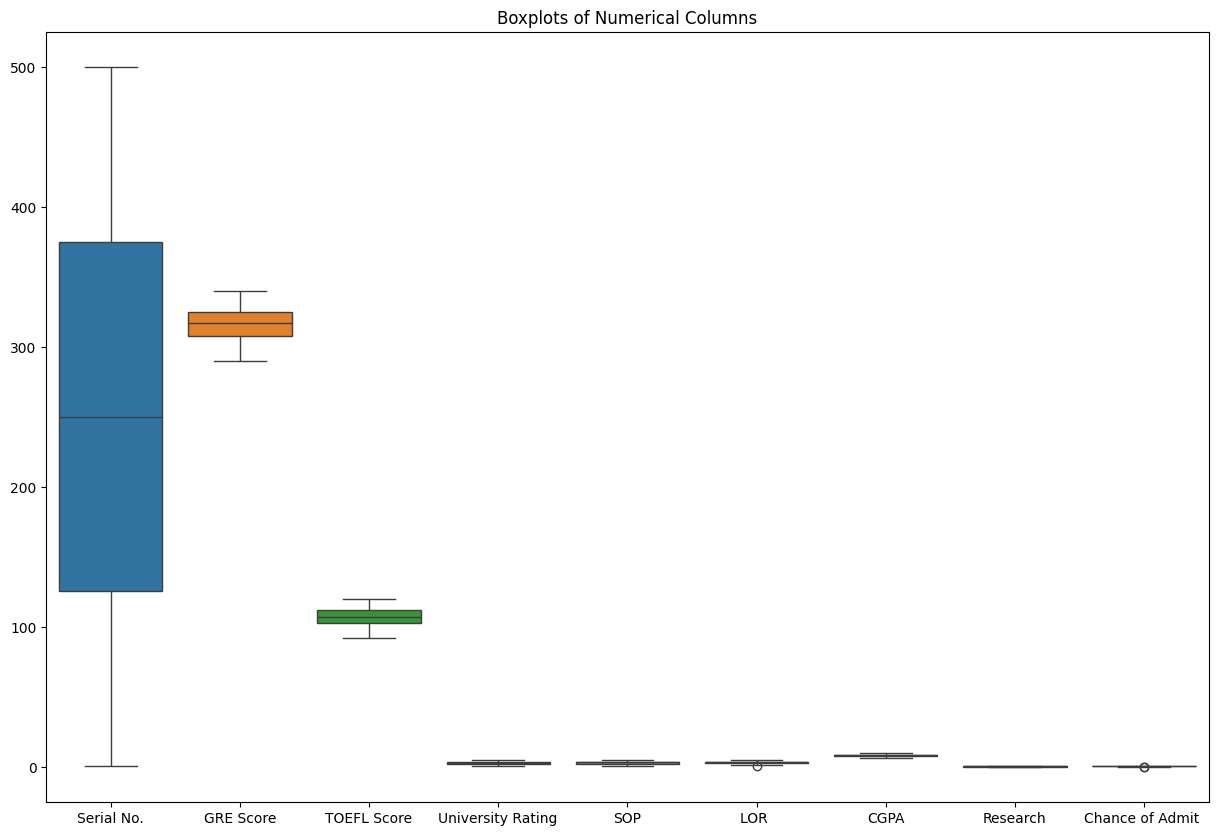

In [43]:
# Histograms for numerical columns
data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Boxplots for outlier detection in numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include='number'))
plt.title("Boxplots of Numerical Columns")
plt.show()


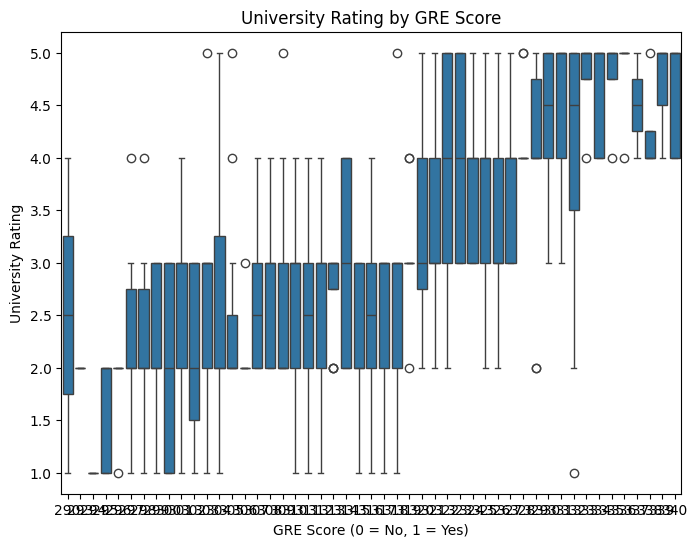

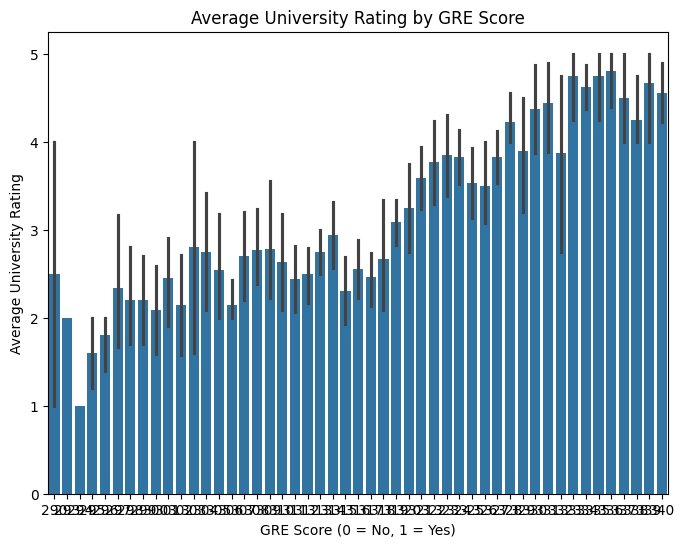

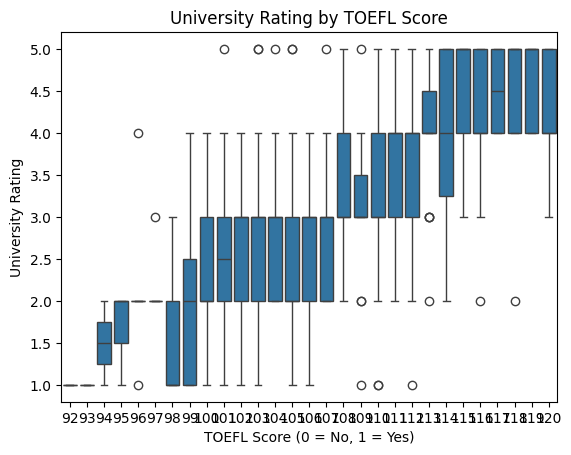

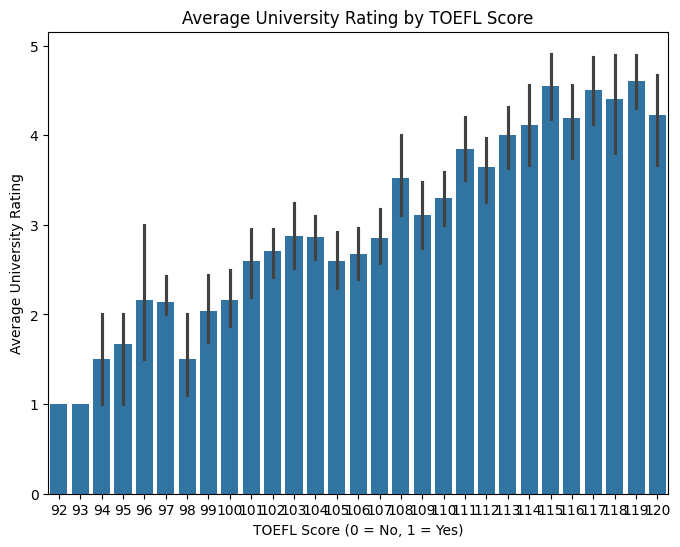

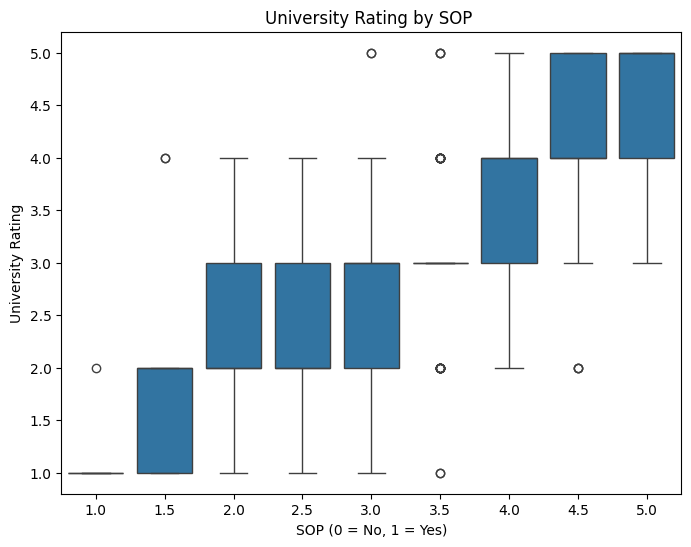

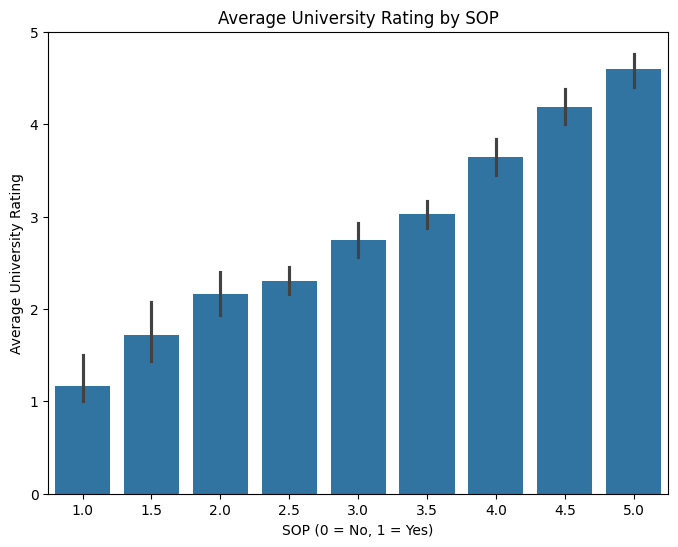

In [44]:
# Boxplot daigram :
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='GRE Score', y='University Rating')
plt.title("University Rating by GRE Score")
plt.xlabel("GRE Score (0 = No, 1 = Yes)")
plt.ylabel("University Rating")
plt.show()

# Barplot daigram :
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='GRE Score', y='University Rating', estimator='mean')
plt.title("Average University Rating by GRE Score")
plt.xlabel("GRE Score (0 = No, 1 = Yes)")
plt.ylabel("Average University Rating")
plt.show()

# Boxplot of university rating by toefl score
sns.boxplot(data=data, x='TOEFL Score', y='University Rating')
plt.title("University Rating by TOEFL Score")
plt.xlabel("TOEFL Score (0 = No, 1 = Yes)")
plt.ylabel("University Rating")
plt.show()

# Bar plot of average university rating by toefl score
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='TOEFL Score', y='University Rating', estimator='mean')
plt.title("Average University Rating by TOEFL Score")
plt.xlabel("TOEFL Score (0 = No, 1 = Yes)")
plt.ylabel("Average University Rating")
plt.show()

# Boxplot of university rating by SOP
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='SOP', y='University Rating')
plt.title("University Rating by SOP ")
plt.xlabel("SOP (0 = No, 1 = Yes)")
plt.ylabel("University Rating")
plt.show()

# Bar plot of average university rating by SOP
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='SOP', y='University Rating', estimator='mean')
plt.title("Average University Rating by SOP")
plt.xlabel("SOP (0 = No, 1 = Yes)")
plt.ylabel("Average University Rating")
plt.show()

In [45]:
# Check for duplicate rows
duplicate_rows =data.duplicated()

# Count of duplicate rows
duplicate_count = duplicate_rows.sum()

# Display duplicate rows
print("Duplicate rows:\n", data[duplicate_rows])
print("\nTotal duplicate rows:", duplicate_count)

Duplicate rows:
 Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []

Total duplicate rows: 0


In [47]:
#Label encoding is a technique used to convert categorical variables into numerical format
#Label encoding is a technique used to convert categorical variables into numerical format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Research'] = label_encoder.fit_transform(data['Research'])

In [48]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [51]:
#Normalization technique is used to adjust the values in a dataset to a common scale
# without distorting differences in the ranges of values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['GRE Score', 'TOEFL Score']] = scaler.fit_transform(data[['GRE Score',
                                                            'TOEFL Score']])

In [52]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,4,4.5,4.5,9.65,1,0.92
1,2,0.68,0.535714,4,4.0,4.5,8.87,1,0.76
2,3,0.52,0.428571,3,3.0,3.5,8.00,1,0.72
3,4,0.64,0.642857,3,3.5,2.5,8.67,1,0.80
4,5,0.48,0.392857,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,9.02,1,0.87
496,497,0.94,0.892857,5,5.0,5.0,9.87,1,0.96
497,498,0.80,1.000000,5,4.5,5.0,9.56,1,0.93
498,499,0.44,0.392857,4,4.0,5.0,8.43,0,0.73


In [56]:
#declare X,Y values in dataset :
x = pd.DataFrame(data["TOEFL Score"])
y = pd.DataFrame(data["University Rating"])


In [57]:
x,y

(     TOEFL Score
 0       0.928571
 1       0.535714
 2       0.428571
 3       0.642857
 4       0.392857
 ..           ...
 495     0.571429
 496     0.892857
 497     1.000000
 498     0.392857
 499     0.750000
 
 [500 rows x 1 columns],
      University Rating
 0                    4
 1                    4
 2                    3
 3                    3
 4                    2
 ..                 ...
 495                  5
 496                  5
 497                  5
 498                  4
 499                  4
 
 [500 rows x 1 columns])

In [62]:
# Split the data into training and testing sets
x_test ,x_train , y_test , y_train = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
x_train,y_train,x_test,y_test

(     TOEFL Score
 361     0.857143
 73      0.571429
 374     0.464286
 155     0.607143
 104     0.714286
 ..           ...
 347     0.071429
 86      0.500000
 75      0.785714
 438     0.642857
 15      0.464286
 
 [100 rows x 1 columns],
      University Rating
 361                  4
 73                   4
 374                  2
 155                  3
 104                  3
 ..                 ...
 347                  1
 86                   3
 75                   2
 438                  1
 15                   3
 
 [100 rows x 1 columns],
      TOEFL Score
 249     0.678571
 433     0.678571
 19      0.357143
 322     0.535714
 332     0.500000
 ..           ...
 106     0.678571
 270     0.464286
 348     0.250000
 435     0.464286
 102     0.500000
 
 [400 rows x 1 columns],
      University Rating
 249                  3
 433                  4
 19                   3
 322                  2
 332                  3
 ..                 ...
 106                  4
 270   

In [65]:
#linear regression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
#prediction
x_pred = model.predict(x_train)
y_pred = model.predict(x_train)

In [67]:
x_pred

array([[4.2798126 ],
       [3.29063341],
       [2.91969121],
       [3.41428081],
       [3.78522301],
       [3.66157561],
       [2.30145422],
       [3.04333861],
       [3.41428081],
       [3.78522301],
       [3.29063341],
       [3.41428081],
       [2.67239642],
       [4.1561652 ],
       [3.53792821],
       [1.93051202],
       [3.29063341],
       [1.93051202],
       [2.42510162],
       [2.42510162],
       [2.91969121],
       [2.17780682],
       [2.54874902],
       [3.41428081],
       [3.78522301],
       [2.54874902],
       [4.7744022 ],
       [3.53792821],
       [2.91969121],
       [3.16698601],
       [2.42510162],
       [3.53792821],
       [2.79604381],
       [3.90887041],
       [2.79604381],
       [3.29063341],
       [2.05415942],
       [4.5271074 ],
       [2.79604381],
       [3.16698601],
       [3.90887041],
       [1.93051202],
       [2.42510162],
       [3.90887041],
       [4.0325178 ],
       [2.17780682],
       [4.5271074 ],
       [3.661

In [68]:
y_pred

array([[4.2798126 ],
       [3.29063341],
       [2.91969121],
       [3.41428081],
       [3.78522301],
       [3.66157561],
       [2.30145422],
       [3.04333861],
       [3.41428081],
       [3.78522301],
       [3.29063341],
       [3.41428081],
       [2.67239642],
       [4.1561652 ],
       [3.53792821],
       [1.93051202],
       [3.29063341],
       [1.93051202],
       [2.42510162],
       [2.42510162],
       [2.91969121],
       [2.17780682],
       [2.54874902],
       [3.41428081],
       [3.78522301],
       [2.54874902],
       [4.7744022 ],
       [3.53792821],
       [2.91969121],
       [3.16698601],
       [2.42510162],
       [3.53792821],
       [2.79604381],
       [3.90887041],
       [2.79604381],
       [3.29063341],
       [2.05415942],
       [4.5271074 ],
       [2.79604381],
       [3.16698601],
       [3.90887041],
       [1.93051202],
       [2.42510162],
       [3.90887041],
       [4.0325178 ],
       [2.17780682],
       [4.5271074 ],
       [3.661

In [69]:
#model coefficient
model.coef_

array([[3.46212717]])

In [70]:
#interception
model.intercept_

array([1.31227503])

In [71]:
#finding score
model.score(x_train,y_train)

0.4294958187331569

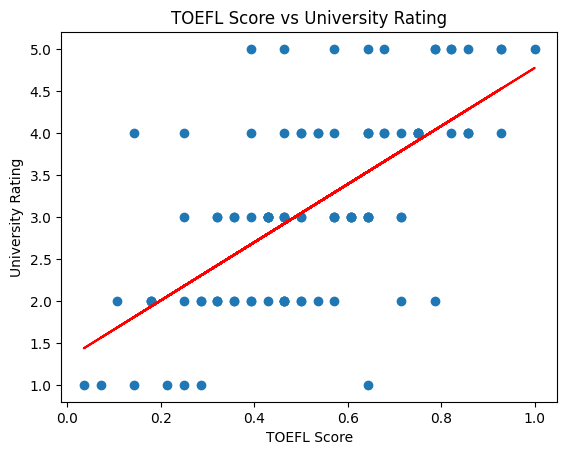

In [72]:
plt.scatter(x_train,y_train)
plt.plot(x_train,x_pred,color='red')
plt.xlabel('TOEFL Score')
plt.ylabel('University Rating')
plt.title('TOEFL Score vs University Rating')
plt.show()

In [73]:
#finding linear regression , lasso regression , ridge :
linear_model = LinearRegression()
lasso_model = Lasso(alpha = 0.1)
ridge_model = Ridge(alpha = 0.1)

In [74]:
linear_model.fit(x_train,y_train)
print("Linear Regression Coefficients:",linear_model.coef_)
print("Linear Regression Intercept:",linear_model.intercept_)


Linear Regression Coefficients: [[3.46212717]]
Linear Regression Intercept: [1.31227503]


In [76]:
ridge_model.fit(x_train,y_train)
print("Ridge Regression Coefficients:",ridge_model.coef_)
print("Ridge Regression Intercept:",ridge_model.intercept_)

Ridge Regression Coefficients: [[3.3885679]]
Ridge Regression Intercept: [1.35068348]


In [75]:
lasso_model.fit(x_train,y_train)
print("Lasso Regression Coefficients:",lasso_model.coef_)
print("Lasso Regression Intercept:",lasso_model.intercept_)

Lasso Regression Coefficients: [1.29132009]
Lasso Regression Intercept: [2.44574644]


In [ ]:

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


ValueError: Found input variables with inconsistent numbers of samples: [400, 100]

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression R-squared:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression R-squared:", r2_score(y_test, y_pred_lasso))


Ridge Regression R-squared: 0.8179793486575073
Lasso Regression R-squared: 0.6372364691673535


In [ ]:
# Display feature coefficients for linear regression
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lin_reg.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


             Feature  Coefficient
5               CGPA     0.112527
6           Research     0.024027
4               LOR      0.017238
1        TOEFL Score     0.002996
2  University Rating     0.002569
0          GRE Score     0.002434
3                SOP     0.001814
